In [1]:
import pandas as pd
import numpy as np
import sys

import os
import matplotlib.pyplot as plt
from dplython import *

from scipy.stats import linregress
from IPython.display import Image

from mpl_toolkits.basemap import Basemap

from matplotlib.colors import Normalize
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import rcParams
from netCDF4 import Dataset

import struct
import binascii
from mpl_toolkits.basemap import addcyclic
from netCDF4 import num2date, date2num, date2index
import datetime

from pyhdf.SD import SD, SDC
import h5py
import glob

%matplotlib inline

C:\Users\hahw9\Anaconda3\envs\cuda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hahw9\Anaconda3\envs\cuda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hahw9\Anaconda3\envs\cuda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hahw9\Anaconda3\envs\cuda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
Dataset = glob.glob('dataset/*.hdf')
print(len(Dataset))

16


In [3]:
list_index = 15
# 0 <= list_index < len(Dataset)

In [4]:
for data_name in Dataset:
    print(data_name)

dataset\GOCI_Yonsei_Aerosol_V2_20110301001642.hdf
dataset\GOCI_Yonsei_Aerosol_V2_20110301011642.hdf
dataset\GOCI_Yonsei_Aerosol_V2_20110301021642.hdf
dataset\GOCI_Yonsei_Aerosol_V2_20110301031642.hdf
dataset\GOCI_Yonsei_Aerosol_V2_20110301041642.hdf
dataset\GOCI_Yonsei_Aerosol_V2_20110301051642.hdf
dataset\GOCI_Yonsei_Aerosol_V2_20110301061642.hdf
dataset\GOCI_Yonsei_Aerosol_V2_20110301071642.hdf
dataset\GOCI_Yonsei_Aerosol_V2_20110302001640.hdf
dataset\GOCI_Yonsei_Aerosol_V2_20110302011640.hdf
dataset\GOCI_Yonsei_Aerosol_V2_20110302021640.hdf
dataset\GOCI_Yonsei_Aerosol_V2_20110302031640.hdf
dataset\GOCI_Yonsei_Aerosol_V2_20110302041640.hdf
dataset\GOCI_Yonsei_Aerosol_V2_20110302051640.hdf
dataset\GOCI_Yonsei_Aerosol_V2_20110302061640.hdf
dataset\GOCI_Yonsei_Aerosol_V2_20110302071640.hdf


In [5]:
hdffile = Dataset[list_index]
hdffile_sd = SD(hdffile, SDC.READ)

print(hdffile_sd.info())


dataset_dic = hdffile_sd.datasets()
for idx, info in enumerate(dataset_dic):
    print(idx, info)
    temp = hdffile_sd.select(info)
    data = temp.get()
    print(data.shape)

(15, 2)
0 Longitude
(473, 463)
1 Latitude
(473, 463)
2 Observation_Minute_UTC
(473, 463)
3 Land_Ocean_Mask
(473, 463)
4 Aerosol_Optical_Depth_550nm
(473, 463)
5 Fine_Mode_Fraction_550nm
(473, 463)
6 Single_Scattering_Albedo_440nm
(473, 463)
7 Angstrom_Exponent_440_870nm
(473, 463)
8 Aerosol_Type
(473, 463)
9 Multiple_Prognostic_Expected_Error_AOD550
(473, 463)
10 Flag
(473, 463)
11 No_of_Used_500m_Pixels_for_One_6km_Product_Pixel
(473, 463)
12 NDVI_from_TOA_Reflectance_660_865nm
(473, 463)
13 Dust_Aerosol_Index_from_412_443nm
(473, 463)
14 Difference_660nm_for_Ocean_Turbidity_Check
(473, 463)


In [6]:
temp = hdffile_sd.select('Longitude')
lon2d = temp.get()
temp = hdffile_sd.select('Latitude')
lat2d = temp.get()
temp = hdffile_sd.select('Aerosol_Optical_Depth_550nm')
AOD = temp.get()

print(lon2d.shape, lat2d.shape, AOD.shape)

(473, 463) (473, 463) (473, 463)


In [7]:
df_lon = pd.DataFrame(lon2d)
df_lat = pd.DataFrame(lat2d)

In [10]:
df_lon

,0,1,2,3,4,5,6,7,8,9,...,453,454,455,456,457,458,459,460,461,462
0,111.370544,111.450150,111.529762,111.609383,111.689011,111.768654,111.848305,111.927971,112.007637,112.087326,...,147.840744,147.920471,148.000183,148.079880,148.159576,148.239258,148.318939,148.398605,148.478256,148.557892
1,111.389893,111.469414,111.548950,111.628494,111.708046,111.787613,111.867188,111.946770,112.026367,112.105972,...,147.822144,147.901794,147.981430,148.061066,148.140671,148.220291,148.299881,148.379471,148.459045,148.538605
2,111.409172,111.488617,111.568077,111.647545,111.727020,111.806511,111.886009,111.965515,112.045029,112.124557,...,147.803604,147.883179,147.962738,148.042297,148.121826,148.201355,148.280884,148.360382,148.439896,148.519379
3,111.428398,111.507767,111.587151,111.666534,111.745941,111.825348,111.904770,111.984200,112.063644,112.143089,...,147.785126,147.864624,147.944107,148.023575,148.103043,148.182495,148.261932,148.341370,148.420792,148.500214
4,111.447563,111.526855,111.606155,111.685471,111.764793,111.844131,111.923477,112.002831,112.082191,112.161568,...,147.766708,147.846130,147.925537,148.004929,148.084320,148.163696,148.243057,148.322418,148.401764,148.481094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,116.417877,116.476929,116.535980,116.595024,116.654060,116.713089,116.772118,116.831139,116.890160,116.949173,...,142.996948,143.055939,143.114929,143.173935,143.232925,143.291946,143.350952,143.409973,143.468994,143.528030
469,116.423233,116.482262,116.541290,116.600304,116.659325,116.718330,116.777336,116.836342,116.895332,116.954323,...,142.991821,143.050797,143.109772,143.168747,143.227722,143.286713,143.345703,143.404694,143.463699,143.522705
470,116.428566,116.487572,116.546577,116.605576,116.664574,116.723557,116.782539,116.841522,116.900497,116.959465,...,142.986725,143.045670,143.104614,143.163574,143.222534,143.281494,143.340469,143.399445,143.458420,143.517395
471,116.433884,116.492874,116.551857,116.610832,116.669800,116.728767,116.787727,116.846687,116.905640,116.964584,...,142.981628,143.040558,143.099487,143.158417,143.217346,143.276291,143.335236,143.394196,143.453156,143.512115


In [12]:
df_lat

,0,1,2,3,4,5,6,7,8,9,...,453,454,455,456,457,458,459,460,461,462
0,46.970455,46.981075,46.991650,47.002178,47.012661,47.023098,47.033489,47.043835,47.054131,47.064384,...,47.073742,47.063530,47.053276,47.042973,47.032627,47.022232,47.011791,47.001305,46.990772,46.980190
1,46.916790,46.927399,46.937962,46.948479,46.958950,46.969372,46.979752,46.990082,47.000366,47.010609,...,47.019951,47.009754,46.999512,46.989223,46.978886,46.968506,46.958076,46.947605,46.937084,46.926517
2,46.863136,46.873730,46.884281,46.894783,46.905239,46.915653,46.926018,46.936337,46.946609,46.956837,...,46.966171,46.955986,46.945755,46.935478,46.925156,46.914787,46.904369,46.893909,46.883404,46.872849
3,46.809483,46.820065,46.830605,46.841095,46.851540,46.861938,46.872288,46.882595,46.892857,46.903072,...,46.912392,46.902222,46.892002,46.881741,46.871429,46.861073,46.850670,46.840221,46.829727,46.819187
4,46.755836,46.766407,46.776932,46.787411,46.797840,46.808228,46.818569,46.828861,46.839111,46.849312,...,46.858624,46.848465,46.838257,46.828007,46.817707,46.807365,46.796974,46.786537,46.776058,46.765530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,21.835442,21.843287,21.851095,21.858870,21.866610,21.874313,21.881983,21.889616,21.897215,21.904778,...,21.911680,21.904148,21.896582,21.888981,21.881344,21.873672,21.865965,21.858223,21.850447,21.842634
469,21.780140,21.787983,21.795792,21.803566,21.811304,21.819006,21.826674,21.834307,21.841904,21.849466,...,21.856367,21.848837,21.841272,21.833672,21.826036,21.818365,21.810659,21.802919,21.795143,21.787331
470,21.724823,21.732666,21.740473,21.748245,21.755983,21.763685,21.771351,21.778982,21.786579,21.794140,...,21.801039,21.793510,21.785946,21.778347,21.770714,21.763044,21.755339,21.747599,21.739824,21.732014
471,21.669493,21.677334,21.685141,21.692911,21.700647,21.708347,21.716013,21.723644,21.731239,21.738798,...,21.745697,21.738171,21.730608,21.723009,21.715376,21.707708,21.700005,21.692265,21.684490,21.676682


In [7]:

lon1d = np.reshape(lon2d, (1, np.product(lon2d.shape)))[0]
lat1d = np.reshape(lat2d, (1, np.product(lat2d.shape)))[0]
aod1d = np.reshape(AOD, (1, np.product(AOD.shape)))[0]

print(lon1d.shape, lat1d.shape, aod1d.shape)

(218999,) (218999,) (218999,)


In [8]:
data = pd.DataFrame(np.column_stack([lat1d, lon1d, aod1d]), columns = ['lat','lon','aod'])
data.head()

,lat,lon,aod
0,46.970455,111.370544,NaN
1,46.981075,111.450150,NaN
2,46.991650,111.529762,NaN
3,47.002178,111.609383,NaN
4,47.012661,111.689011,NaN


In [9]:
data.isnull().sum()

lat         0
lon         0
aod    200896
dtype: int64

In [10]:
print(min(data.lat), max(data.lat))
print(min(data.lon), max(data.lon))
print(min(data.aod), max(data.aod))

21.614147186279297 48.20196533203125
111.37054443359375 148.55789184570312
nan nan


In [11]:
aod_data = data['aod']
aod_data.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: aod, dtype: float32

In [12]:
dataset = data.fillna(0)
dataset

,lat,lon,aod
0,46.970455,111.370544,0.0
1,46.981075,111.450150,0.0
2,46.991650,111.529762,0.0
3,47.002178,111.609383,0.0
4,47.012661,111.689011,0.0
...,...,...,...
218994,21.652357,143.271103,0.0
218995,21.644653,143.330032,0.0
218996,21.636917,143.388962,0.0
218997,21.629143,143.447906,0.0


In [13]:
aod_dataset = dataset['aod']
aod_dataset

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
218994    0.0
218995    0.0
218996    0.0
218997    0.0
218998    0.0
Name: aod, Length: 218999, dtype: float32

In [14]:
aod_dataset != 0

0         False
1         False
2         False
3         False
4         False
          ...  
218994    False
218995    False
218996    False
218997    False
218998    False
Name: aod, Length: 218999, dtype: bool

In [15]:
aod_pre = aod_dataset[aod_dataset != 0]
aod_pre.head()

39497    0.197949
39961    0.173366
43155    0.603535
43620    0.256907
43621    0.268059
Name: aod, dtype: float32

In [16]:
aod_mean = aod_pre.mean()
aod_std = aod_pre.std()
print(aod_mean, aod_std)

0.28004268 0.30609804


In [17]:
dataset['AOD'] = (dataset['aod'] - aod_mean) / aod_std
dataset.head()

,lat,lon,aod,AOD
0,46.970455,111.370544,0.0,-0.914879
1,46.981075,111.450150,0.0,-0.914879
2,46.991650,111.529762,0.0,-0.914879
3,47.002178,111.609383,0.0,-0.914879
4,47.012661,111.689011,0.0,-0.914879


In [18]:
dataset = dataset.replace(dataset['AOD'][1], np.NaN)
dataset

,lat,lon,aod,AOD
0,46.970455,111.370544,0.0,NaN
1,46.981075,111.450150,0.0,NaN
2,46.991650,111.529762,0.0,NaN
3,47.002178,111.609383,0.0,NaN
4,47.012661,111.689011,0.0,NaN
...,...,...,...,...
218994,21.652357,143.271103,0.0,NaN
218995,21.644653,143.330032,0.0,NaN
218996,21.636917,143.388962,0.0,NaN
218997,21.629143,143.447906,0.0,NaN


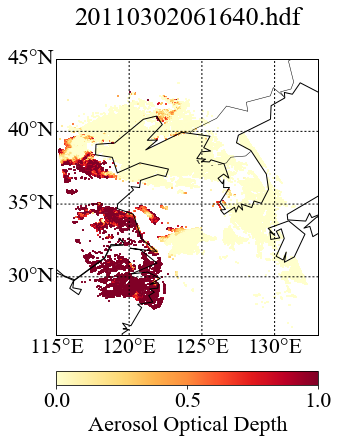

In [36]:
plt.figure(figsize = (12, 6))
#plt.style.use('seaborn-darkgrid')
plt.rc("font", size = 22)
plt.rcParams['font.family'] = 'Times New Roman'
m = Basemap(projection='cyl', lon_0 = 111.37, lat_0 = 21.614,
           llcrnrlon = 115, llcrnrlat = 26,
           urcrnrlon = 133, urcrnrlat = 45,
           resolution = 'c')

X, Y = m(dataset.lon.values, dataset.lat.values)
VAL = dataset.AOD.values
cmap_color = 'YlOrRd'
m.scatter(X, Y, c = VAL, s = 1.0, marker = "s", zorder = 1, vmin = 0, vmax = 1, cmap = plt.cm.get_cmap(cmap_color), alpha = 1.0)
# pass_color : YlOrBr, YlOrRd
'''
cmap_color_list = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn','rainbow','RdYlGn']
'''            
m.colorbar(location='bottom', label = 'Aerosol Optical Depth', pad = 0.5)
m.drawcoastlines(color = 'black')
m.drawcountries(color = 'black')
m.drawmapboundary(fill_color = 'white')
m.drawparallels(np.arange(-150,120,5), labels=[1,0,0,0], dashes = [2,2], color = 'black')
m.drawmeridians(np.arange(-180,180,5), labels=[0,0,0,1], dashes = [2,2], color = 'black')

plt.title(Dataset[list_index-1].split('_')[-1] + "\n",color = 'black')
plt.show()

## 폰트 찾기

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [21]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

383


In [22]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트명 만 출력
f[:10]

383


['STIXNonUnicode',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'cmex10',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans',
 'cmsy10']

In [23]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'New' in f.name]

[('Times New Roman', 'C:\\Windows\\Fonts\\timesbi.ttf'),
 ('NewJumja', 'C:\\Windows\\Fonts\\JUMJA.TTF'),
 ('Courier New', 'C:\\Windows\\Fonts\\courbi.ttf'),
 ('Times New Roman', 'C:\\Windows\\Fonts\\timesi.ttf'),
 ('Times New Roman', 'C:\\Windows\\Fonts\\times.ttf'),
 ('Courier New', 'C:\\Windows\\Fonts\\courbd.ttf'),
 ('Microsoft New Tai Lue', 'C:\\Windows\\Fonts\\ntailub.ttf'),
 ('Courier New', 'C:\\Windows\\Fonts\\cour.ttf'),
 ('New Gulim', 'C:\\Windows\\Fonts\\NGULIM.TTF'),
 ('Microsoft New Tai Lue', 'C:\\Windows\\Fonts\\ntailu.ttf'),
 ('Times New Roman', 'C:\\Windows\\Fonts\\timesbd.ttf'),
 ('Courier New', 'C:\\Windows\\Fonts\\couri.ttf')]